[Check out the Librosa documentation here ](https://librosa.org/doc/latest/index.html)

Waveplots

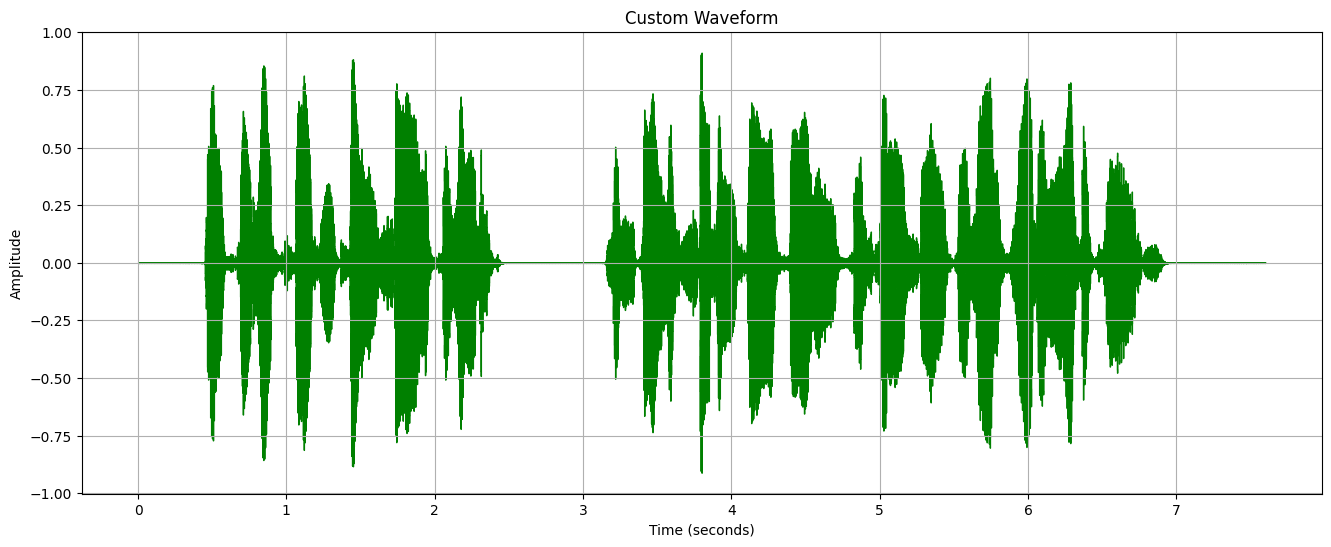

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('/content/morgan-freeman-convert-file.wav')

# Plot the waveform with customization
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y, sr=sr, max_points=10000, axis='time', color='green')
plt.title('Custom Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



Amplitude Envelope & Onset Detection

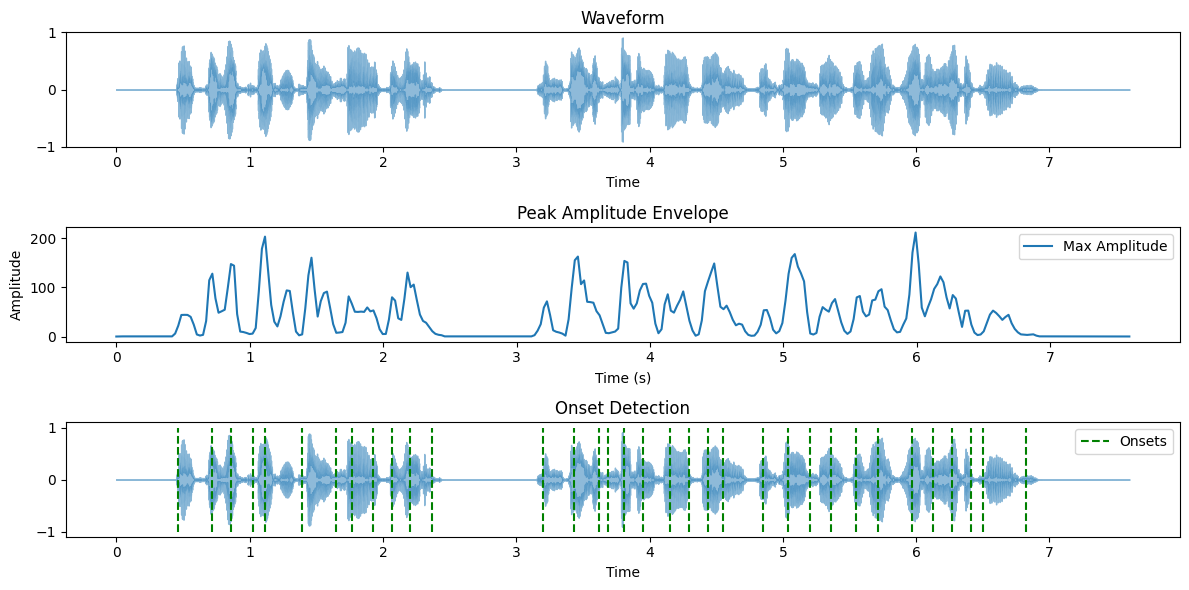

In [ ]:
# Compute STFT
audio_path = '/content/morgan-freeman-convert-file.wav'
y, sr = librosa.load(audio_path)

stft = librosa.stft(y)

# Find maximum amplitude across frequencies for each time step
amplitude_envelope = np.max(np.abs(stft), axis=0)

plt.figure(figsize=(12, 6))

# Plot the waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.title('Waveform')

# Plot the peak amplitude envelope
plt.subplot(3, 1, 2)
plt.plot(librosa.frames_to_time(np.arange(len(amplitude_envelope)), sr=sr), amplitude_envelope, label='Max Amplitude')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Peak Amplitude Envelope')
plt.legend()

# Plot onset times as vertical lines
plt.subplot(3, 1, 3)
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.vlines(onset_time, -1, 1, color='g', linestyle='dashed', label='Onsets')
plt.legend()
plt.title('Onset Detection')

plt.tight_layout()
plt.show()


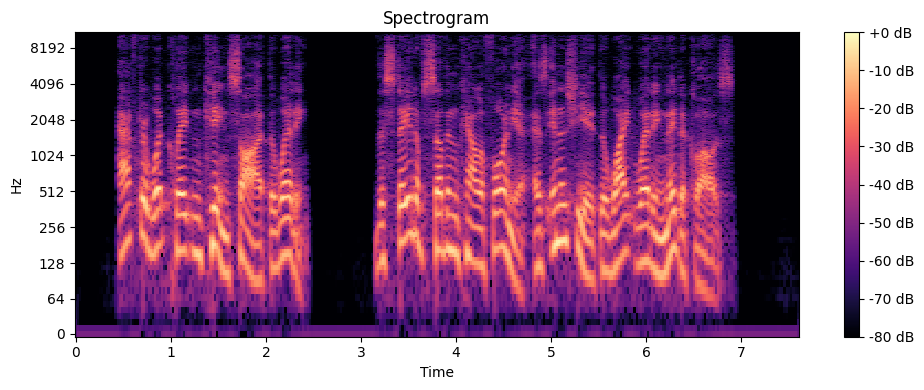

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an example audio file
y, sr = librosa.load("/content/morgan-freeman-convert-file.wav")

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert the complex-valued STFT to magnitude
S = np.abs(D)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()


 Alterations to the Spectrogram

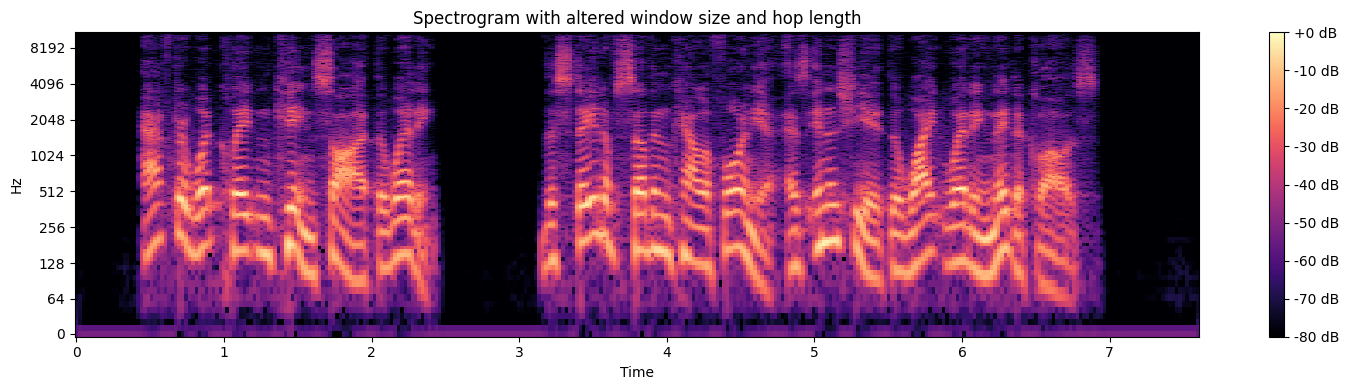

In [ ]:
# Compute STFT with different window size and hop length
D_alt = librosa.stft(y, n_fft=2048, hop_length=512)

# Convert the complex-valued STFT to magnitude
S_alt = np.abs(D_alt)

# Plot the altered spectrogram
plt.figure(figsize=(15, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_alt, ref=np.max), sr=sr, x_axis='time', y_axis='log', hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with altered window size and hop length')
plt.tight_layout()
plt.show()


Applying Log Scale for Frequencies


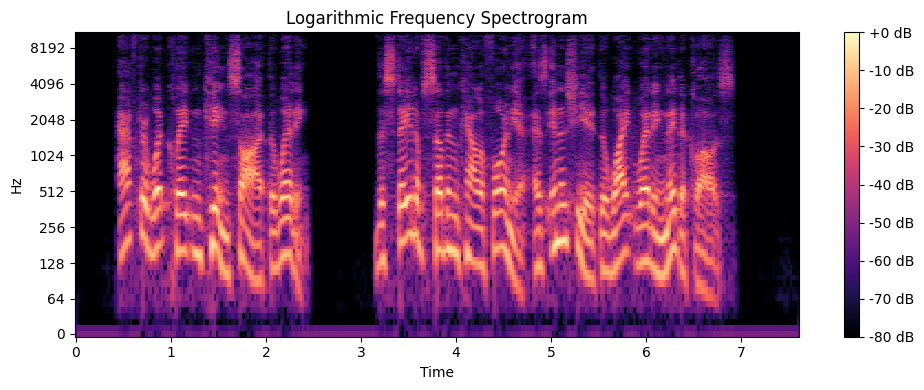

In [ ]:
# Plot the spectrogram with logarithmic scale
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Logarithmic Frequency Spectrogram')
plt.tight_layout()
plt.show()


Comparision

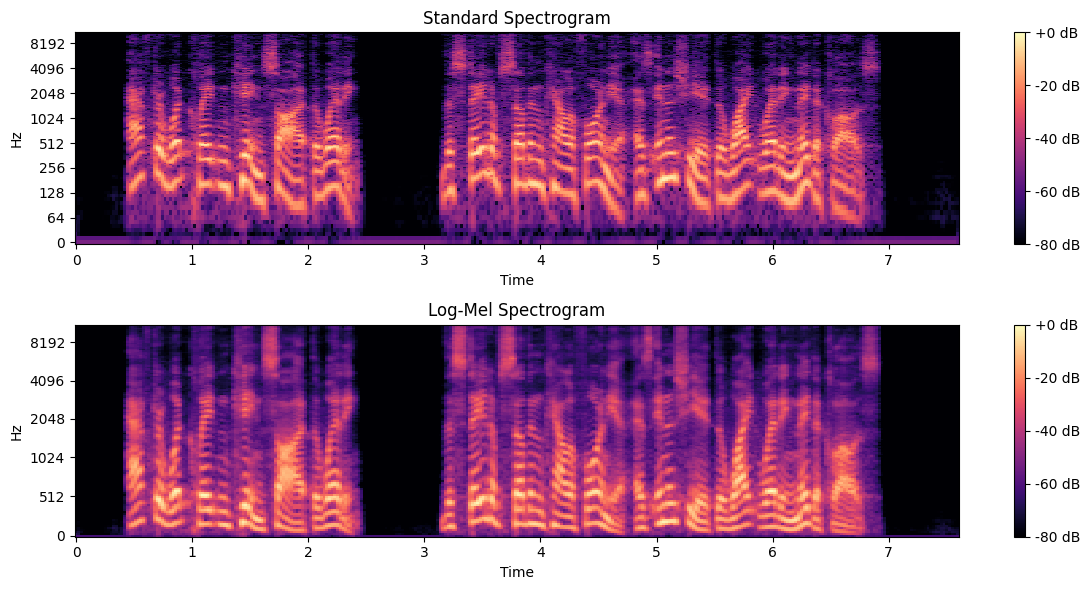

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload the custom WAV file

y, sr = librosa.load("/content/morgan-freeman-convert-file.wav")

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert the complex-valued STFT to magnitude
S = np.abs(D)

# Convert to dB for standard spectrogram
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Compute the Mel spectrogram
S_mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to log scale (dB) for Mel spectrogram
S_log_mel = librosa.power_to_db(S_mel, ref=np.max)

# Plot the standard spectrogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Standard Spectrogram')

# Plot the log-mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(S_log_mel, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')

plt.tight_layout()
plt.show()


Impact of n_mfcc on the Plots
Dimensionality: The n_mfcc parameter determines how many coefficients are computed for each frame of the audio signal. By default, n_mfcc=13, which means 13 coefficients per frame. Increasing n_mfcc results in more coefficients being computed and displayed on the y-axis of the MFCC plot.

Detail and Resolution:

Lower n_mfcc values (e.g., 13): Typically capture the most essential features of the audio signal. The first few coefficients generally represent the overall shape of the spectral envelope, which is often sufficient for many speech and audio recognition tasks.
Higher n_mfcc values (e.g., 40): Provide more detailed information about the spectral envelope. This can be useful for more fine-grained audio analysis but can also include more noise or irrelevant information.

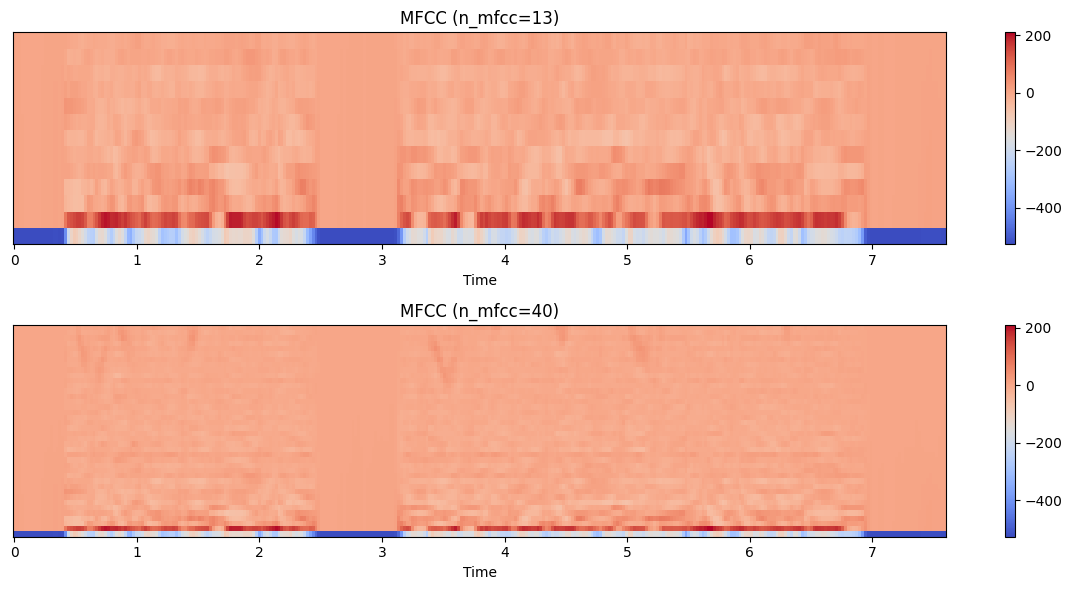

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files




# Load the custom WAV file

y, sr = librosa.load("/content/morgan-freeman-convert-file.wav")

# Compute MFCCs with different n_mfcc values
mfccs_13 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_40 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

# Plot the MFCCs with n_mfcc=13
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(mfccs_13, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC (n_mfcc=13)')

# Plot the MFCCs with n_mfcc=40
plt.subplot(2, 1, 2)
librosa.display.specshow(mfccs_40, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC (n_mfcc=40)')

plt.tight_layout()
plt.show()


Chromagram
A chromagram is a representation of the pitch content of an audio signal over time. It maps the spectral energy into 12 pitch classes (C, C#, D, ..., B) and is useful for tasks like chord recognition, key detection, and music information retrieval.

Harmonic Spectrogram
A harmonic spectrogram focuses on the harmonic components of an audio signal. It is typically derived from a standard spectrogram by isolating the peaks corresponding to harmonic partials. This representation is useful for analyzing tonal sounds and music.

Percussive Spectrogram
A percussive spectrogram emphasizes the transient and percussive elements of an audio signal. It is often obtained by subtracting the harmonic spectrogram from the original spectrogram. This representation is valuable for studying rhythmic patterns and percussive instruments.

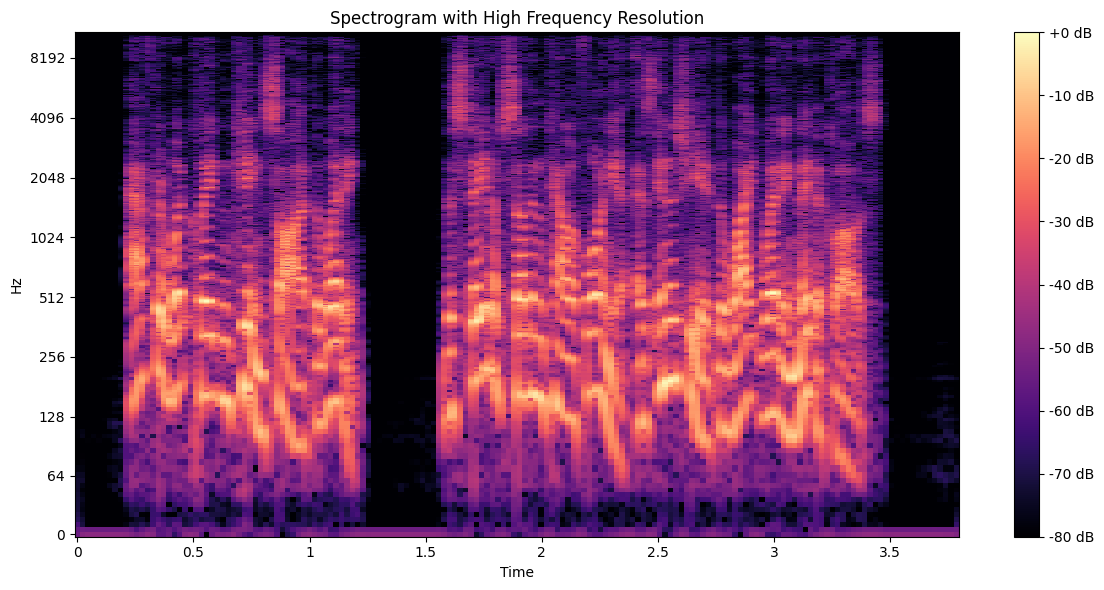

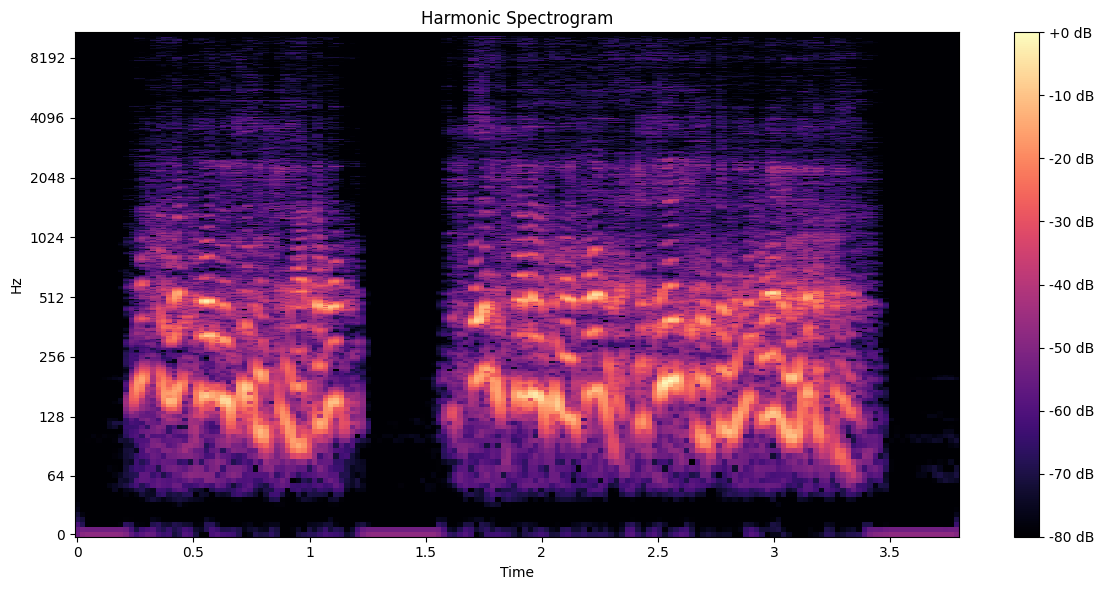

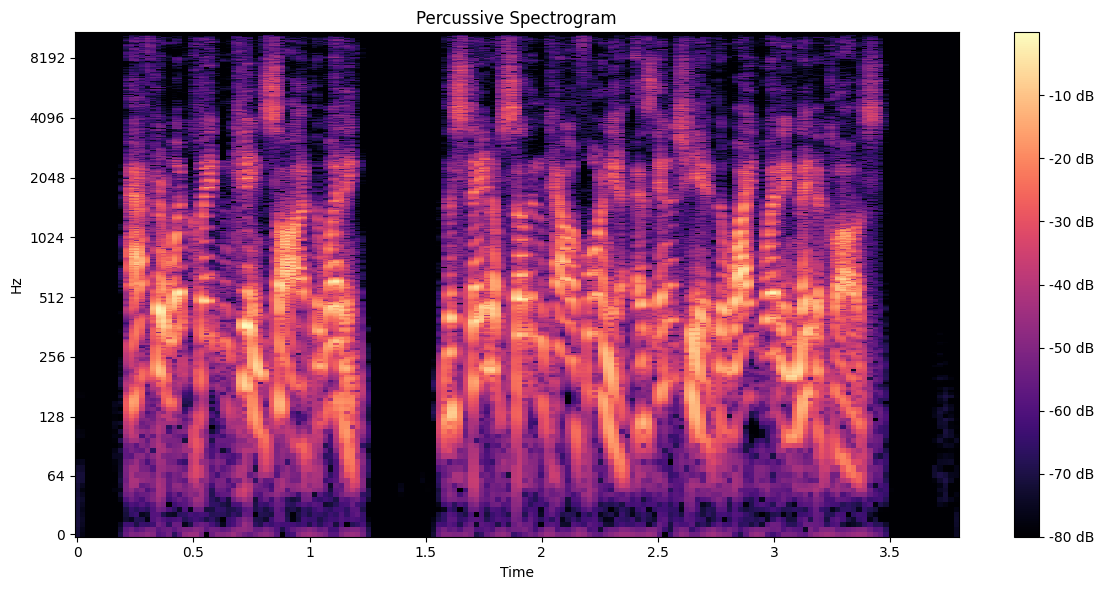

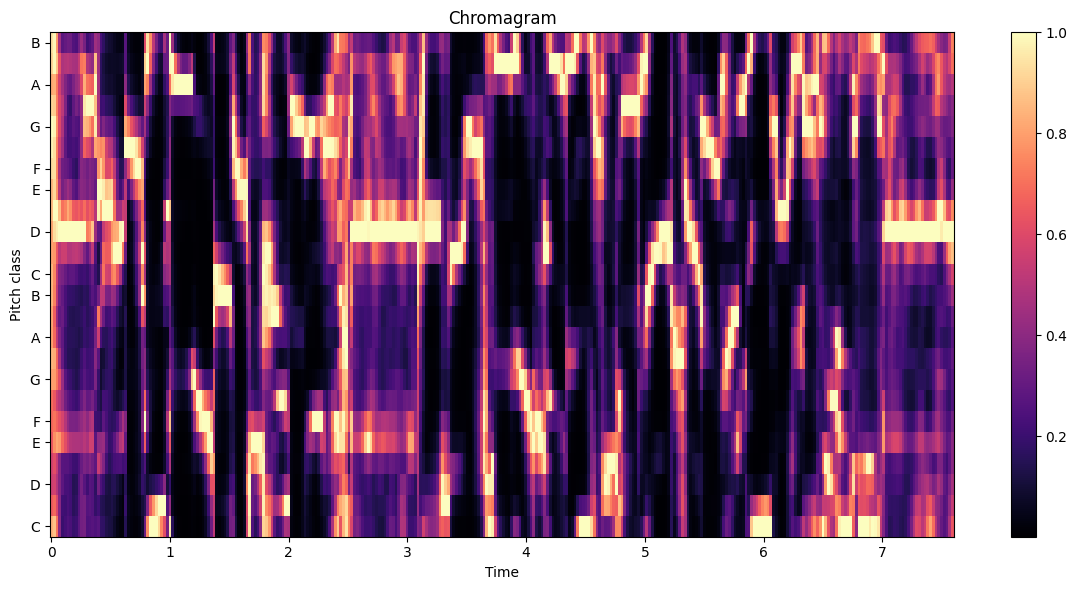

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


y, sr = librosa.load("/content/morgan-freeman-convert-file.wav")

# Compute the Short-Time Fourier Transform (STFT) with a high number of FFT points for better frequency resolution
D = librosa.stft(y, n_fft=4096)

# Convert the complex-valued STFT to magnitude
S = np.abs(D)

# Convert to dB
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Plot the spectrogram with high frequency resolution
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with High Frequency Resolution')
plt.tight_layout()
plt.show()

# Harmonic-Percussive Source Separation (HPSS)
harmonic, percussive = librosa.effects.hpss(y)

# Compute and plot harmonic spectrogram
D_harmonic = librosa.stft(harmonic, n_fft=4096)
S_harmonic = np.abs(D_harmonic)
S_harmonic_db = librosa.amplitude_to_db(S_harmonic, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_harmonic_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic Spectrogram')
plt.tight_layout()
plt.show()

# Compute and plot percussive spectrogram
D_percussive = librosa.stft(percussive, n_fft=4096)
S_percussive = np.abs(D_percussive)
S_percussive_db = librosa.amplitude_to_db(S_percussive, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_percussive_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Percussive Spectrogram')
plt.tight_layout()
plt.show()

# Compute and plot chromagram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=4096,n_chroma=24)

plt.figure(figsize=(12, 6))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()
